
Epoch 1:
----------------------------------------

Weights and Biases:

Layer 1 to Layer 2 Weights:
[[-0.2421  0.8869  0.464   0.1974]
 [-0.6815 -0.6941 -0.8885  0.7316]]

Layer 2 Biases:
[ 0.2219  0.3958 -0.967   0.932 ]

Layer 2 to Layer 3 Weights:
[[ 0.7192]
 [-0.6023]
 [-0.7309]
 [-0.6607]]

Layer 3 Biases:
[-0.3895]

Predictions vs Actual:

Input  | Predicted | Actual | Correct
-----------------------------------
[0 0] |     0     |   1    | ✗
[0 1] |     0     |   0    | ✓
[1 0] |     0     |   0    | ✓
[1 1] |     0     |   1    | ✗

Epoch Accuracy: 50.00%

Epoch 100:
----------------------------------------

Weights and Biases:

Layer 1 to Layer 2 Weights:
[[-1.1527  2.7048  2.7417  0.8434]
 [-1.7771 -1.8182 -3.2192  1.291 ]]

Layer 2 Biases:
[-0.0307  0.6798 -1.3444  0.4183]

Layer 2 to Layer 3 Weights:
[[ 1.8508]
 [ 3.544 ]
 [-3.7019]
 [-1.5005]]

Layer 3 Biases:
[-0.6207]

Predictions vs Actual:

Input  | Predicted | Actual | Correct
-----------------------------------
[0 0

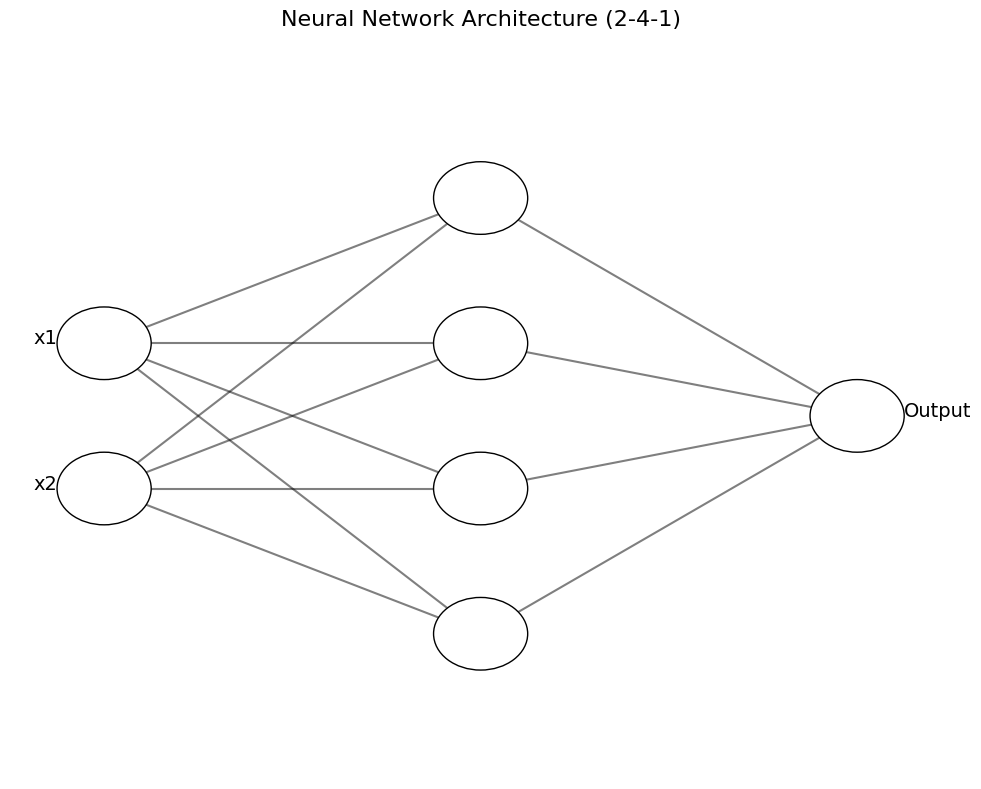

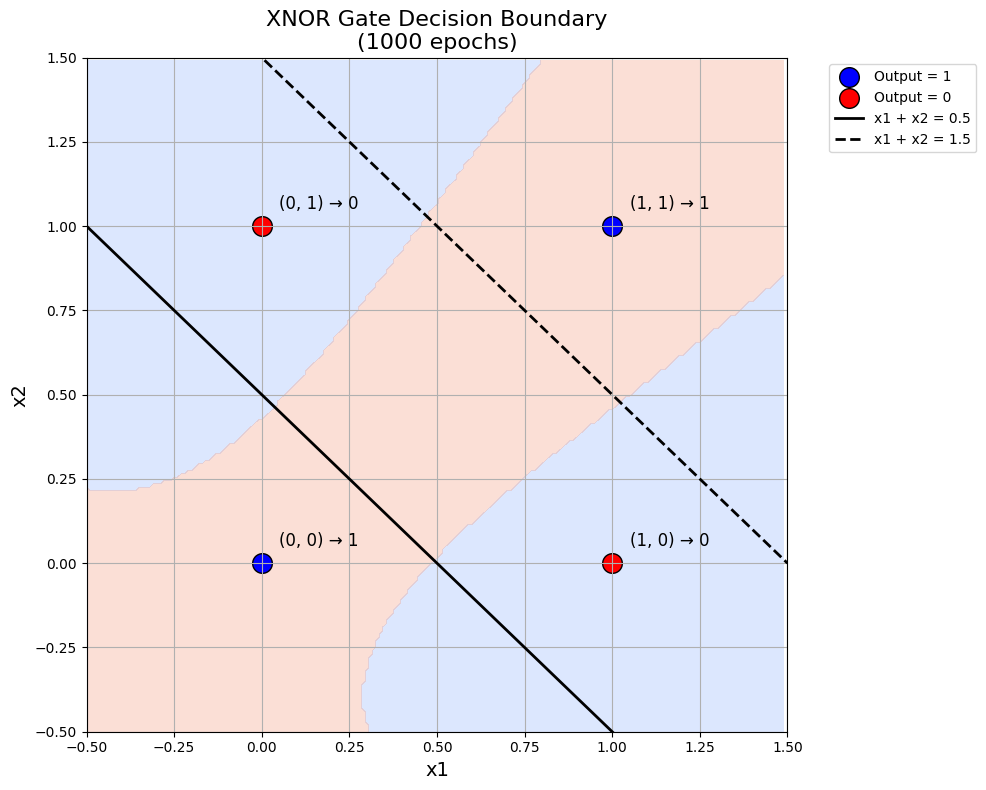

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Define the XNOR gate truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input pairs
y = np.array([1, 0, 0, 1])  # XNOR gate outputs

# Initialize the MLP with proper parameters
mlp = MLPClassifier(hidden_layer_sizes=(4,), activation='tanh', solver='sgd',
                    learning_rate_init=0.1, max_iter=1, random_state=42,
                    tol=1e-10, n_iter_no_change=max_epochs, warm_start=True)

# Manually train for a fixed number of epochs
max_epochs = 1000
for epoch in range(max_epochs):
    mlp.partial_fit(X, y, classes=np.unique(y))

    # Print detailed information every 10 epochs
    if (epoch + 1) % 100 == 0 or epoch == 0 or epoch == max_epochs - 1:
        print(f"\nEpoch {epoch + 1}:")
        print("-" * 40)

        # Print weights and biases
        print("\nWeights and Biases:")
        for i, (coef, intercept) in enumerate(zip(mlp.coefs_, mlp.intercepts_)):
            print(f"\nLayer {i+1} to Layer {i+2} Weights:")
            print(np.round(coef, 4))
            print(f"\nLayer {i+2} Biases:")
            print(np.round(intercept, 4))

        # Print predictions
        predicted = mlp.predict(X)
        print("\nPredictions vs Actual:")
        print("\nInput  | Predicted | Actual | Correct")
        print("-" * 35)
        for i in range(len(X)):
            print(f"{X[i]} | {predicted[i]:^9} | {y[i]:^6} | {'✓' if predicted[i] == y[i] else '✗'}")

        print(f"\nEpoch Accuracy: {np.mean(predicted == y)*100:.2f}%")

print(f"\nFinal Results: Completed {max_epochs} epochs")

# Visualization code remains the same
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)

    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            x = n*h_spacing + left
            y = layer_top - m*v_spacing
            circle = plt.Circle((x, y), v_spacing/4., color='w', ec='k', zorder=4)
            ax.add_patch(circle)
            if n == 0:
                plt.text(x-0.05, y, f'x{m+1}', fontsize=14, ha='right')
            elif n == len(layer_sizes)-1:
                plt.text(x+0.05, y, 'Output', fontsize=14, ha='left')
            else:
                plt.text(x, y, f'h{m+1}', fontsize=12, ha='center', va='center')

    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                 [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing],
                                 c='k', alpha=0.5)
                ax.add_line(line)

# Figure 1: Neural Network Architecture
plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.axis('off')
plt.title('Neural Network Architecture (2-4-1)', fontsize=16, pad=20)
draw_neural_net(ax, 0.1, 0.9, 0.1, 0.9, [2, 4, 1])
plt.tight_layout()
plt.show()

# Figure 2: Decision Boundary
plt.figure(figsize=(10, 8))
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = mlp.predict(grid)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm', levels=[-0.5, 0.5, 1.5])
for i in range(len(X)):
    color = 'blue' if y[i] == 1 else 'red'
    label = 'Output = 1' if y[i] == 1 and i == 0 else 'Output = 0' if y[i] == 0 and i == 1 else ''
    plt.scatter(X[i, 0], X[i, 1], c=color, s=200, edgecolors='black', label=label)
    plt.text(X[i, 0] + 0.05, X[i, 1] + 0.05, f'({X[i, 0]}, {X[i, 1]}) → {y[i]}', fontsize=12)

x = np.linspace(-0.5, 1.5, 100)
plt.plot(x, 0.5 - x, 'k-', label='x1 + x2 = 0.5', linewidth=2)
plt.plot(x, 1.5 - x, 'k--', label='x1 + x2 = 1.5', linewidth=2)

plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)
plt.title(f'XNOR Gate Decision Boundary\n({max_epochs} epochs)', fontsize=16)
plt.grid(True)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()